In [1]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt

In [2]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

In [3]:
# Define a shallow neural network with, one input, one output, and three hidden units
def shallow_1_1_3(x, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
  # Initial lines
  pre_1 = theta_10 + theta_11 * x
  pre_2 = theta_20 + theta_21 * x
  pre_3 = theta_30 + theta_31 * x
  # Activation functions
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)
  # Weight activations
  w_act_1 = phi_1 * act_1
  w_act_2 = phi_2 * act_2
  w_act_3 = phi_3 * act_3
  # Combine weighted activation and add y offset
  y = phi_0 + w_act_1 + w_act_2 + w_act_3
  # Return everything we have calculated
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

In [4]:
# # Plot the shallow neural network.  We'll assume input in is range [-1,1] and output [-1,1]
def plot_neural(x, y):
  fig, ax = plt.subplots()
  ax.plot(x.T,y.T)
  ax.set_xlabel('Input'); ax.set_ylabel('Output')
  ax.set_xlim([-1,1]);ax.set_ylim([-1,1])
  ax.set_aspect(1.0)
  plt.show()

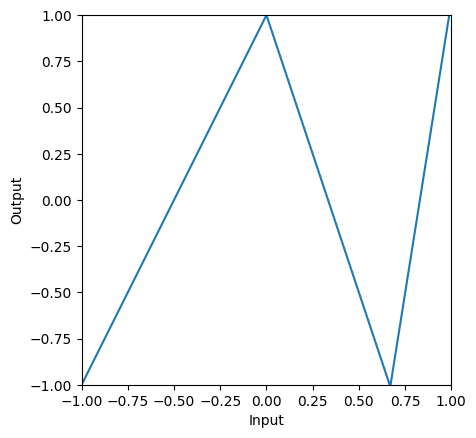

In [5]:

# Now lets define some parameters and run the first neural network
n1_theta_10 = 0.0   ; n1_theta_11 = -1.0
n1_theta_20 = 0     ; n1_theta_21 = 1.0
n1_theta_30 = -0.67 ; n1_theta_31 =  1.0
n1_phi_0 = 1.0; n1_phi_1 = -2.0; n1_phi_2 = -3.0; n1_phi_3 = 9.3

# Define a range of input values
n1_in = np.arange(-1,1,0.01).reshape([1,-1])

# We run the neural network for each of these input values
n1_out, *_ = shallow_1_1_3(n1_in, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
# And then plot it
plot_neural(n1_in, n1_out)

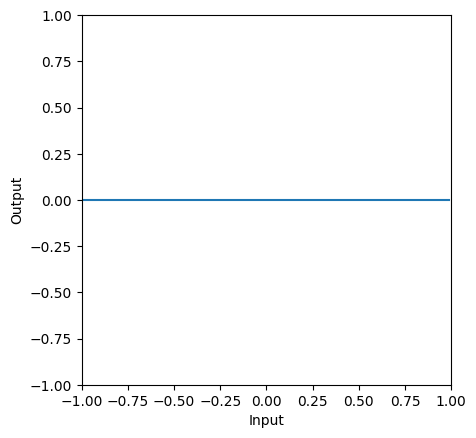

In [6]:
beta_0 = np.zeros((3,1))
Omega_0 = np.zeros((3,1))
beta_1 = np.zeros((1,1))
Omega_1 = np.zeros((1,3))

# TODO Fill in the values of the beta and Omega matrices with the n1_theta and n1_phi parameters that define the network above
# !!! NOTE THAT MATRICES ARE CONVENTIONALLY INDEXED WITH a_11 IN THE TOP LEFT CORNER, BUT NDARRAYS START AT [0,0]
# To get you started I've filled in a couple:
beta_0[0,0] = n1_theta_10
Omega_0[0,0] = n1_theta_11

# Make sure that input data matrix has different inputs in its columns
n_data = n1_in.size
n_dim_in = 1
n1_in_mat = np.reshape(n1_in,(n_dim_in,n_data))

# This runs the network for ALL of the inputs, x at once so we can draw graph
h1 = ReLU(np.matmul(beta_0,np.ones((1,n_data))) + np.matmul(Omega_0,n1_in_mat))
n1_out = np.matmul(beta_1,np.ones((1,n_data))) + np.matmul(Omega_1,h1)

# Draw the network and check that it looks the same as the non-matrix case
plot_neural(n1_in, n1_out)

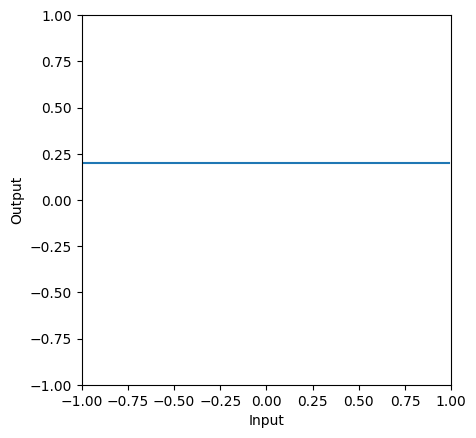

In [7]:
# Now lets define some parameters and run the second neural network
n2_theta_10 =  -0.6 ; n2_theta_11 = -1.0
n2_theta_20 =  0.2  ; n2_theta_21 = 1.0
n2_theta_30 =  -0.5  ; n2_theta_31 =  1.0
n2_phi_0 = 0.5; n2_phi_1 = -1.0; n2_phi_2 = -1.5; n2_phi_3 = 2.0

# Define a range of input values
n2_in = np.arange(-1,1,0.01)

# We run the second neural network on the output of the first network
n2_out, *_ = \
    shallow_1_1_3(n1_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
# And then plot it
plot_neural(n1_in, n2_out)

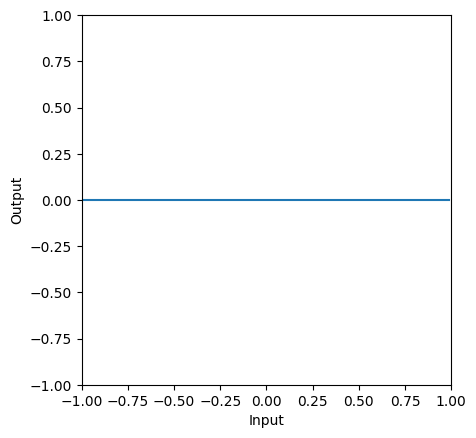

In [14]:
beta_0 = np.zeros((3,1))
Omega_0 = np.zeros((3,1))
beta_1 = np.zeros((3,1))
Omega_1 = np.zeros((3,3))
beta_2 = np.zeros((1,1))
Omega_2 = np.zeros((1,3))

# TODO Fill in the values of the beta and Omega matrices for the n1_theta, n1_phi, n2_theta, and n2_phi parameters
# that define the composition of the two networks above (see eqn 4.5 for Omega1 and beta1 albeit in different notation)
# !!! NOTE THAT MATRICES ARE CONVENTIONALLY INDEXED WITH a_11 IN THE TOP LEFT CORNER, BUT NDARRAYS START AT [0,0] SO EVERYTHING IS OFFSET
# To get you started I've filled in a few:
beta_0[0,0] = n1_theta_10
Omega_0[0,0] = n1_phi_0
beta_1[0,0] = n2_theta_10 + n2_phi_1 * n1_phi_0
Omega_1[0,0] = n2_phi_1 * n1_phi_0
beta_2[0,0] = 0  # We don't have information about n3_theta and n3_phi
Omega_2[0,0] = 0

# Make sure that input data matrix has different inputs in its columns
n_data = n1_in.size
n_dim_in = 1
n1_in_mat = np.reshape(n1_in,(n_dim_in,n_data))

# This runs the network for ALL of the inputs, x at once so we can draw graph (hence extra np.ones term)
h1 = ReLU(np.matmul(beta_0,np.ones((1,n_data))) + np.matmul(Omega_0,n1_in_mat))
h2 = ReLU(np.matmul(beta_1,np.ones((1,n_data))) + np.matmul(Omega_1,h1))
n1_out = np.matmul(beta_2,np.ones((1,n_data))) + np.matmul(Omega_2,h2)

# Draw the network and check that it looks the same as the non-matrix version
plot_neural(n1_in, n1_out)

In [15]:


# Define sizes
D_i = 4
D_1 = 5
D_2 = 2
D_3 = 4
D_o = 1

# Set the number of data points
n_data = 4

# Generate input data randomly
x = np.random.normal(size=(D_i, n_data))

# Define ReLU function
def ReLU(x):
    return np.maximum(0, x)

# Initialize parameters randomly with correct sizes
beta_0 = np.random.normal(size=(D_1, 1))
Omega_0 = np.random.normal(size=(D_1, D_i))
beta_1 = np.random.normal(size=(D_2, 1))
Omega_1 = np.random.normal(size=(D_2, D_1))
beta_2 = np.random.normal(size=(D_3, 1))
Omega_2 = np.random.normal(size=(D_3, D_2))
beta_3 = np.random.normal(size=(D_o, 1))
Omega_3 = np.random.normal(size=(D_o, D_3))

# Compute intermediate layers
h1 = ReLU(np.matmul(Omega_0, x) + beta_0)
h2 = ReLU(np.matmul(Omega_1, h1) + beta_1)
h3 = ReLU(np.matmul(Omega_2, h2) + beta_2)

# Compute output
y = np.matmul(Omega_3, h3) + beta_3

# Check shapes
if h1.shape != (D_1, n_data):
    print("h1 has wrong shape")
if h2.shape != (D_2, n_data):
    print("h2 has wrong shape")
if h3.shape != (D_3, n_data):
    print("h3 has wrong shape")
if y.shape != (D_o, n_data):
    print("Output has wrong shape")

# Print input and output
print("Input data points:")
print(x)
print("Output data points:")
print(y)


Input data points:
[[ 1.47217168  0.17924201 -0.34264987  0.15428447]
 [ 0.15567892 -0.63643465 -0.59256269 -1.84967845]
 [ 0.13915021 -0.1285137   0.98815585  0.53769141]
 [ 0.3916515   0.85609977 -0.37926729 -2.35919959]]
Output data points:
[[ 0.32691601 -0.9916415  -0.9916415  -0.9916415 ]]
